In [2]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
img=cv2.imread('./test_images/cr.webp')
img.shape

(900, 552, 3)

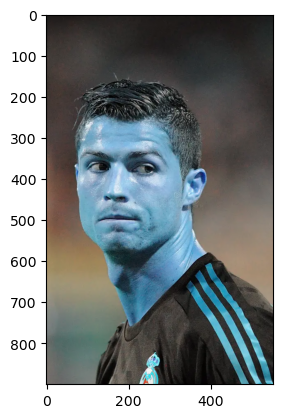

In [4]:
plt.imshow(img)

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(900, 552)

In [6]:
gray

array([[ 27,  27,  27, ...,  28,  28,  28],
       [ 27,  27,  27, ...,  28,  28,  28],
       [ 28,  28,  28, ...,  28,  28,  28],
       ...,
       [111, 110, 111, ..., 202, 209, 170],
       [111, 110, 111, ..., 199, 219, 207],
       [111, 111, 111, ..., 201, 206, 204]], dtype=uint8)

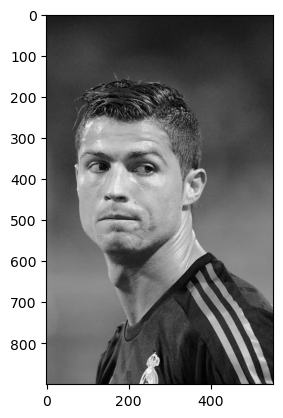

In [7]:
plt.imshow(gray, cmap='gray')

In [8]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 25, 246, 312, 312]])

In [9]:
(x,y,w,h) = faces[0]
x,y,w,h

(25, 246, 312, 312)

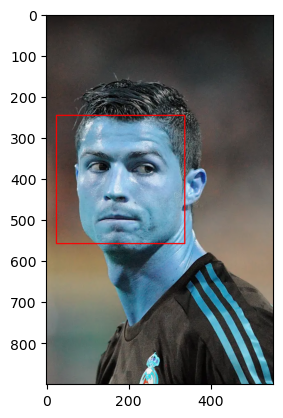

In [10]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

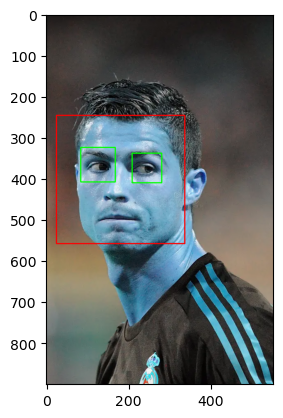

In [11]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

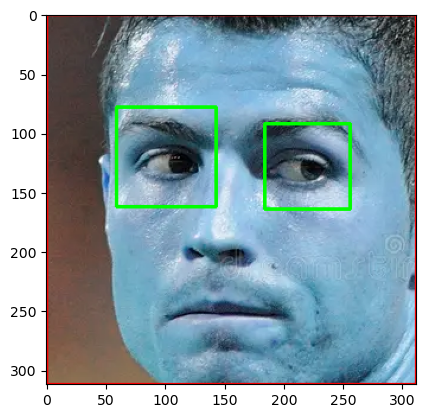

In [12]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')    #to crop the facial region of the image 

In [54]:
cropped_img = np.array(roi_color)
cropped_img.shape

(124, 124, 3)

In [53]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

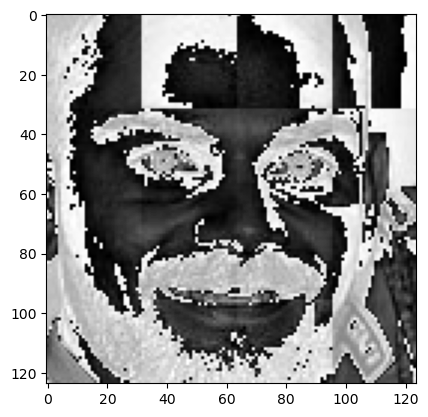

In [55]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [36]:
def get_cropped_image_if_2_eyes(image_path):
    try:
        img = cv2.imread(image_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            
            if len(eyes) >= 2:
                return roi_color
    except Exception as e:
        print("An error occurred while processing the image:", e)
        return None


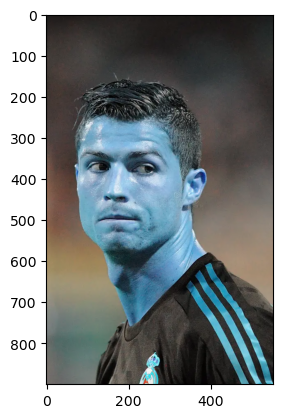

In [37]:
original_image=cv2.imread('./test_images/cr.webp')
plt.imshow(original_image)

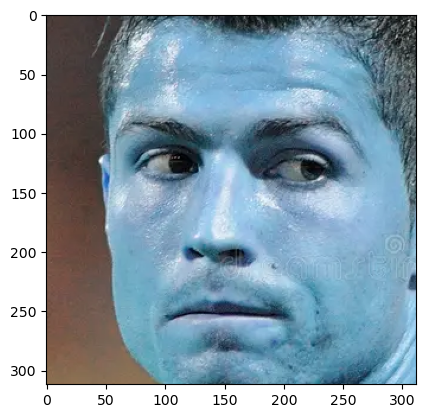

In [38]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/cr.webp')
plt.imshow(cropped_image)

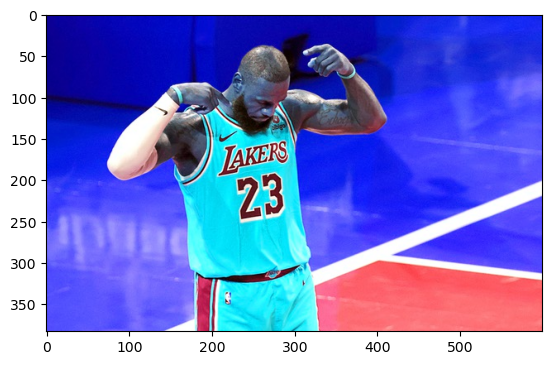

In [39]:
original_image_obstructed=cv2.imread('./test_images/james.jpg')
plt.imshow(original_image_obstructed)

In [47]:
cropped_image_obstructed = get_cropped_image_if_2_eyes('./test_images/james.jpg')
cropped_image_obstructed           #ici comme il n'a pas détecté les yeux alors il n'envoit rien

In [48]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [49]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)        

In [50]:
img_dirs

['./dataset/cristiano_ronaldo',
 './dataset/lebron_james',
 './dataset/lionel_messi',
 './dataset/mike_tyson',
 './dataset/neymar_junior',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']

In [51]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)     # if there is no cropped file then create it

In [52]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/cristiano_ronaldo
Generating cropped images in folder:  ./dataset/cropped/lebron_james
An error occurred while processing the image: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Generating cropped images in folder:  ./dataset/cropped/lionel_messi
Generating cropped images in folder:  ./dataset/cropped/mike_tyson
Generating cropped images in folder:  ./dataset/cropped/neymar_junior
An error occurred while processing the image: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Generating cropped images in folder:  ./dataset/cropped/roger_federer
Generating cropped images in folder:  ./dataset/cropped/serena_williams
Generating cropped images in folder:  ./dataset/cropped/virat_kohli


In [56]:
celebrity_file_names_dict   #to show all cropped photos

{'cristiano_ronaldo': ['./dataset/cropped/cristiano_ronaldo/cristiano_ronaldo1.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo2.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo3.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo4.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo5.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo6.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo7.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo8.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo9.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo10.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo11.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo12.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo13.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo14.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo15.png',
  './dataset/

In [57]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'cristiano_ronaldo': 0,
 'lebron_james': 1,
 'lionel_messi': 2,
 'mike_tyson': 3,
 'neymar_junior': 4,
 'roger_federer': 5,
 'serena_williams': 6,
 'virat_kohli': 7}

In [59]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])  

In [60]:
len(X)

224

In [61]:
len(y)

224

In [62]:
len(X[0])  #32*32*3 + 32*32

4096

In [64]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(224, 4096)